<a href="https://colab.research.google.com/github/vdlphm/CS403-Fall-2023/blob/main/hw6/hw6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 6 Dynamics Simulation

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import math 
import time 
import seaborn as sns
from matplotlib import animation
from IPython.display import HTML
%matplotlib inline

# Q.1 **Ball Bouncing Simulation**
<img src="https://github.com/DARoSLab/CS403-Intro-Robotics/blob/main/hws/hw6/bouncing_ball.png?raw=true" width="400">

## **Q.1 (a) [10pts] Make a simulation of the a bouncing ball with the following characterstics.**
\begin{align}
m &=1kg, p_0=(0, 1.5), v_0=(0.3, -0.1), \gamma=0.8, 
\end{align}
where $\gamma$ is the coefficient of resititution of the ball. use $\Delta t=0.001$ sec and simulate the bouncing ball during 3 sec. (Note: No frictional loss)

In [ ]:
def simulate_ball(mass, coeff_rest, init_pos, init_vel, delta_t, N=3000):
  g = -9.8
  p_hist = np.zeros((N, 2))
  v_hist = np.zeros((N, 2))
  t_hist = np.zeros(N)
  p_hist[0, :] = init_pos
  v_hist[0, :] = init_vel
  for i in range(1, N):
      # Fill your code: Add velocity update with acceleration
      v_x = v_hist[i - 1, 0]
      v_y = v_hist[i - 1, 1] + g * delta_t

      if p_hist[i-1, 1] <= 0 and v_y < 0:
         # Fill your code: Sudden velocity change when the ball hits the ground
         v_x = v_x * coeff_rest
         v_y = -v_y * coeff_rest  

      v_hist[i, :] = [v_x, v_y]  

      # Fill your code: Update ball position
      p_hist[i, :] = p_hist[i - 1, :] + v_hist[i, :] * delta_t
      
      t_hist[i] = i*delta_t
  return p_hist, v_hist, t_hist

In [ ]:
g = -9.8
N = 3000

# Fill your code: set up proper parameters and initial state to call the 'simulate_ball' function
mass = 1
init_pos =  [0, 1.5] # x, y
init_vel = [0.3, -0.1] # x_vel, y_vel
coeff_rest = 0.8
delta_t = 0.001
[p_hist, v_hist, t_hist] = simulate_ball(mass, coeff_rest, init_pos, init_vel, delta_t, N)

In [ ]:
# Bouncing ball visualization: No need to change
def plot_bouncingball(p_history, t_history, num_frames= 100):
  fig= plt.figure(figsize=(10,10))
  ax = plt.subplot(1,1,1)   
  wall1, = ax.plot([-2, 2], [0, 0], 'b', lw=1)          
  ball, = ax.plot([0], [0], 'ro', markersize=12)     
  
  txt_title = ax.set_title('')
  
  ax.set_xlim(( -1.5, 1.5))            
  ax.set_ylim((-0.5, 2.5))
  txt_title = ax.set_title('')
  interval = len(p_history)//num_frames
  def drawFrame(k):
    k = interval*k
    p0 = p_history[k]

    ball.set_data([p0[0]], [p0[1]])
    txt_title.set_text('t = {:.2f} sec'.format(t_history[k]))
    return ball,
  anim = animation.FuncAnimation(fig, drawFrame, frames=num_frames, interval=interval, blit=True)
  return anim

In [ ]:
anim = plot_bouncingball(p_hist, t_hist, num_frames= 100)
plt.close()
HTML(anim.to_html5_video())

In [ ]:
plt.plot(p_hist[:, 0], p_hist[:, 1])
plt.show()

##Q.1(b) [5 pts] **What is the position and velocity of the ball after 2 sec ?**

In [ ]:
# Fill your code: Print the position and velocity at 1 sec
print('pos: [{0}, {1}], vel: [{2}, {3}]'.format(p_hist[1000, 0], p_hist[1000, 1], v_hist[1000, 0], v_hist[1000, 1]))

pos: [0.27257999999999666, 0.9628051200000137], vel: [0.24, -0.12383999999997193]


##Q.1(c) [10 pts] **What is the position and velocity of the ball after 2 sec when you use $\Delta_t=0.01$? Explain why the values are different from the result of (a). Put your answers in the following text box.**

In [ ]:
# Fill your code: Simulate the bouncing ball again with new delta t
delta_t_2 = 0.01
[p_hist_2, v_hist_2, t_hist_2] = simulate_ball(mass, coeff_rest, init_pos, init_vel, delta_t_2, N // 10)

# Fill your code: Print the position and velocity at 1 sec
print('pos: [{0}, {1}], vel: [{2}, {3}]'.format(p_hist_2[100, 0], p_hist_2[100, 1], v_hist_2[100, 0], v_hist_2[100, 1]))

pos: [0.2724000000000007, 0.9967199999999999], vel: [0.24, -0.018000000000000654]


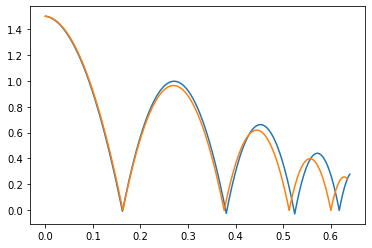

In [ ]:
plt.plot(p_hist_2[:, 0], p_hist_2[:, 1])
plt.plot(p_hist[:, 0], p_hist[:, 1])
plt.show()

## Q.1 (c) Put your explanation here:

Because we use different delta_t, the velocity will when hitting the ground will be a little bit different and result in a different rebounb velocity.

# Q.2 **Pinball Simulation**
<img src="https://github.com/DARoSLab/CS403-Intro-Robotics/blob/main/hws/hw6/pinball.png?raw=true" width="500">

## Q.2 [20 pts] (a) Simulate the pin ball motion. Assume the radius of the ball is approximately zero and no frictional loss. Use coefficient of restitution, $\gamma$ = 0.9, initial pos: [0.5, 1.0], and initial velocity: [1.5, 0.5]. Simulate over 5 sec. 

In [ ]:
# Collision checking code: No need to change
def point_line_distance(point, line):
  distance = np.linalg.norm(np.cross(line[0]-point, line[1]-point))/np.linalg.norm(line[1]-line[0])
  return distance 

def detect_collsion(pos, walls, threshold=0.001):
  dlist = []
  collision_idx = None
  for i, wall in enumerate(walls):
    d = point_line_distance(pos, wall)
    dlist.append(d)
    if d<=threshold:
      collision_idx = i
  return collision_idx

In [ ]:
# Simulate Pinball
def simulate_pinball(coeff_rest, init_pos, init_vel, delta_t, walls, wall_norms, wall_tan, N=3000):
  p_hist = np.zeros((N, 2))
  v_hist = np.zeros((N, 2))
  t_hist = np.zeros(N)

  p_hist[0, :] = init_pos
  v_hist[0, :] = init_vel
  t_hist[0] = 0
  for i in range(1, N):
      v_hist[i, :] = v_hist[i-1, :];

      # Fill your code: Check collision and update velocity
      collision_id = detect_collision(p_hist[i - 1], walls)

      if collision_id == 0 or collision_id == 2:
        v_hist[i, 0] = -v_hist[i, 0] * coeff_rest
      elif collision_id == 0 or collision_id == 2:
        v_hist[i, 1] = -v_hist[i, 1] * coeff_rest

      p_hist[i, :] = p_hist[i - 1, :] + v_hist[i] * delta_t
     
      t_hist[i] = i*delta_t    
  return p_hist, v_hist, t_hist

In [ ]:
# Wall definition code: No need to change
wall1 = np.array([[0, 0], [0, 2]])
wall1_norm = [1, 0]
wall1_tan = [0, 1]

wall2 = np.array([[0, 2], [1, 2]])
wall2_norm = [0, -1]
wall2_tan = [1, 0]


wall3 = np.array([[1, 2], [1, 1]])
wall3_norm = [-1, 0]
wall3_tan = [0, 1]

wall4 = np.array([[1, 1], [0, 0]])
wall4_norm = [-1/np.sqrt(2), 1/np.sqrt(2)]
wall4_tan = [1/np.sqrt(2), 1/np.sqrt(2)]

walls = [wall1, wall2, wall3, wall4]
wall_norms = [wall1_norm, wall2_norm, wall3_norm, wall4_norm]
wall_tan = [wall1_tan, wall2_tan, wall3_tan, wall4_tan]

In [ ]:
N_pinball = 5000

# Fill your code: Simulate pinball
dt_pinball = 0.001
coeff_rest = 0.9

init_pos = [0.5, 1.0]
init_vel = [1.5, 0.5]

[p_hist_pinball, v_hist_pinball, t_hist_pinball] = simulate_pinball(coeff_rest, init_pos, init_vel, dt_pinball, walls, wall_norms, wall_tan, N_pinball)

In [ ]:
# Visualize Pinball Matplotlib: No need to change
def plot_pinball(q, ts, walls, num_frames= 100):
  fig= plt.figure(figsize=(10,10))
  ax = plt.subplot(1,1,1)   
  # m, c, l, g, mu, dt = params
  wall1, = ax.plot([walls[0][0][0], walls[0][1][0]], [walls[0][0][1], walls[0][1][1]], 'b', lw=1)     
  wall2, = ax.plot([walls[1][0][0], walls[1][1][0]], [walls[1][0][1], walls[1][1][1]], 'b', lw=1)     
  wall3, = ax.plot([walls[2][0][0], walls[2][1][0]], [walls[2][0][1], walls[2][1][1]], 'b', lw=1)     
  wall4, = ax.plot([walls[3][0][0], walls[3][1][0]], [walls[3][0][1], walls[3][1][1]], 'b', lw=1)     
  ball, = ax.plot([0], [0], 'ro', markersize=12)     
  
  txt_title = ax.set_title('')
  
  ax.set_xlim(( -1, 2))            
  ax.set_ylim((-0.5, 2.5))
  txt_title = ax.set_title('')
  interval = len(q)//num_frames
  def drawFrame(k):
    k = interval*k
    q0 = q[k]
    ball.set_data([q0[0]], [q0[1]])
    txt_title.set_text('t = {:.2f} sec'.format(ts[k]))
    return ball,
  anim = animation.FuncAnimation(fig, drawFrame, frames=num_frames, interval=interval, blit=True)
  return anim

In [ ]:
anim = plot_pinball(p_hist_pinball, t_hist_pinball, walls, num_frames= 100)
plt.close()
HTML(anim.to_html5_video())


## Q.2.(b) [5 pts] **What is the position and velocity of the ball after 1, 2, 3 sec ?**


In [ ]:
# Fill your code: Print the position and velocity of the ball @ 1, 2, 3 sec
...

1 sec pos: [0.09905 1.5    ], vel: [-1.35  0.5 ] 
2 sec pos: [0.8844125 1.99905  ], vel: [-1.0935 -0.45  ] 
3 sec pos: [0.1898213 1.54905  ], vel: [ 0.98415 -0.45   ] 


## Q.2.(c) [10 pts] **Plot the kinetic energy of the ball. Based on the plot explain how the ball loses its energy (Note: The pinball's mass is 1 kg)**

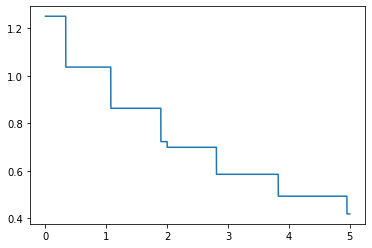

In [ ]:
kin_energy = np.zeros(N_pinball)

# Fill your code: Compute kinetic energy of the ball and plot
...

plt.plot(t_hist_pinball, kin_energy)
plt.show()

# Q.3 Swing Stick
<img src="https://github.com/DARoSLab/CS403-Intro-Robotics/blob/main/hws/hw6/SwingArm.png?raw=true" width="500">

## Q.3.(a) [20 pts] Implement a swing stick simulation. 
Use parameters, [$m, I, c, l, \mu, dt$] = [1, 0.05, 0.5, 1.0, 0, 0.001]. 

Simulate the case when [$\theta_0, \dot{\theta}_0$] = [0, 0] and $F$ is applied at the tip of the arm during 0.05 sec to the vertical direction. 


In [ ]:
def sim_step(theta, theta_dot, F, tau , params=None):
  m, I, c, l, mu, dt = params
  # Fill your code: implement dynamics to compute the angular acceleration
  theta_ddot = ...

  # Fill your code: Semi-implciti Euler integration
  th_dot = ...
  th = ...

  return [th, th_dot]
  
def simulate_stick(theta=0, theta_dot=0, F=50, tau=0, F_duration=0.05, F_start_time=0.0, T=1.0, params=None):
  dt = params[-1]
  ts = np.linspace(0, T, int(T/dt))
  theta_hist = [theta]
  theta_dot_hist = [theta_dot]

  # Fill your code: Implement the case that the external force pushes the tip of the arm
  for i, t in enumerate(ts):
    ...
    
  ts = ts.tolist()
  ts.append(T)
  return [theta_hist, theta_dot_hist, ts]

In [ ]:
# Visualization code: Do not need to change
def plot_stick(q, ts, params, num_frames= 100):
  fig= plt.figure(figsize=(10,10))
  ax = plt.subplot(1,1,1)   
  m, I, c, l, mu, dt = params
  link1, = ax.plot([], [], 'b', lw=10)     # ax.plot returns a list of 2D line objects  
  txt_title = ax.set_title('')
  
  ax.set_xlim(( -2.5, 2.5))    # Canvas size        
  ax.set_ylim((-2.5, 2.5))
  txt_title = ax.set_title('')
  interval = len(q)//num_frames

  def drawFrame(k):
    k = interval*k
    q0 = q[k]
    rA = [l*np.cos(q0), l*np.sin(q0)]
    x1 = 0
    x2 = rA[0]
    y1 = 0
    y2 = rA[1]
    link1.set_data([x1, x2], [y1, y2])
    txt_title.set_text('t = {:.2f} sec'.format(ts[k]))
    return link1,

  anim = animation.FuncAnimation(fig, drawFrame, frames=num_frames, interval=interval, blit=True)
  return anim

In [ ]:
# Let's use param: [mass, Inertia, CoM, length, friction coefficient, delta_t]
# Fill your code: Run simulation
params = ... 
[theta_hist, theta_dot_hist, ts] = ...

In [ ]:
anim = plot_stick(theta_hist, ts, params)
plt.close()
HTML(anim.to_html5_video())

## Q.3.(b) [5 pts] What is the angular position and velocity after 0.5, 1.0, 1.5 sec?

In [ ]:
# Fill your code: Print the angular position and velocity of the arm @ 1, 2, 3 sec
...

1 sec pos: 0.3962334159211724, vel: 0.8332971897656587 
2 sec pos: 0.8128820108040016, vel: 0.8332971897656587 
3 sec pos: 1.2295306056868613, vel: 0.8332971897656587 


## Q.3. (c) [15 pts] Compute the torque to hold the position of the stick when $F = 50$N at the three following position ($\dot{\theta} = 0$)
### (i) $\theta=0$, $\theta=\frac{\pi}{4}$, and $\theta=\frac{\pi}{6}$
### (ii) Simulate the robot at the configuration in (i) and check whether the stick moves or not.

In [ ]:
_, _, _, l, _, _ = params

# Fill your code: Compute the torque to hold the motion of the arm
...

Torque: -50.00 Nm
Torque: -35.36 Nm
Torque: -43.30 Nm


In [ ]:
# Test your torque: The arm should not move
[theta_hist, theta_dot_hist, ts] = simulate_stick(theta=theta, theta_dot=0, F=50, tau=tau, F_duration=1.0, F_start_time=0.0, T=1.0, params=params)
anim = plot_stick(theta_hist, ts, params)
plt.close()
HTML(anim.to_html5_video())